In [143]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import pearsonr
from statsmodels.tsa.api import VAR
import numpy as np

In [144]:
def parser(s):
    return datetime.striptime(s,'%Y-%m')

In [145]:
ice_cream_heater_df = pd.read_csv('ice_cream_vs_heater.csv', parse_dates=[0],index_col=0,squeeze=True)

In [146]:
ice_cream_heater_df = ice_cream_heater_df.asfreq(pd.infer_freq(ice_cream_heater_df.index))

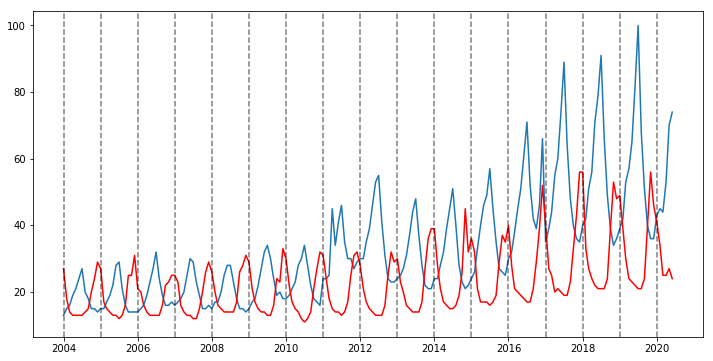

In [147]:
plt.figure(figsize=(12,6))
ice_cream,= plt.plot(ice_cream_heater_df['ice cream'])
heater,= plt.plot(ice_cream_heater_df['heater'],color='red')

for year in range(2004,2021):
    plt.axvline(datetime(year,1,1),linestyle='--',color='k',alpha=0.5)

In [148]:
avgs = ice_cream_heater_df.mean()
devs = ice_cream_heater_df.std()

In [149]:
for col in ice_cream_heater_df.columns:
    ice_cream_heater_df[col] = (ice_cream_heater_df[col] - avgs.loc[col]) / devs.loc[col]

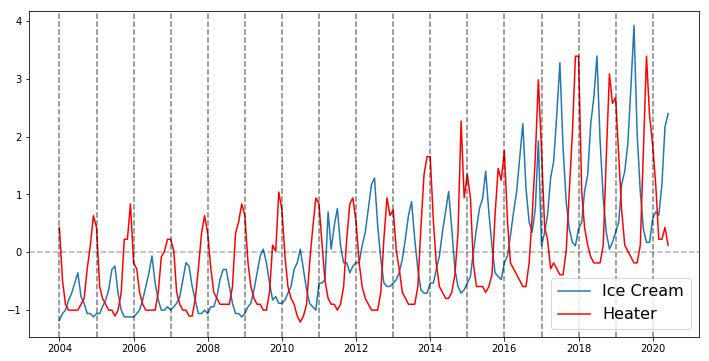

In [150]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

In [151]:
ice_cream_heater_df = ice_cream_heater_df.diff().dropna()

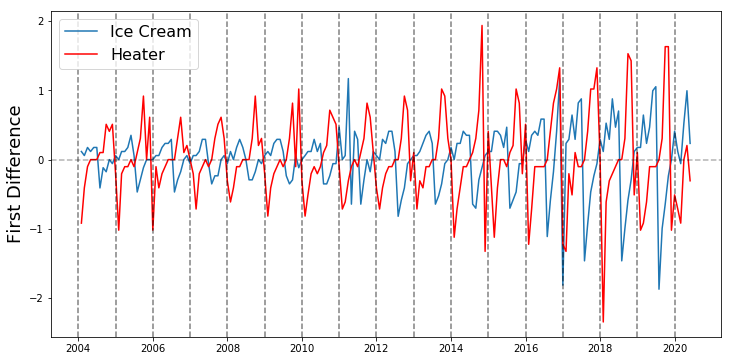

In [152]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

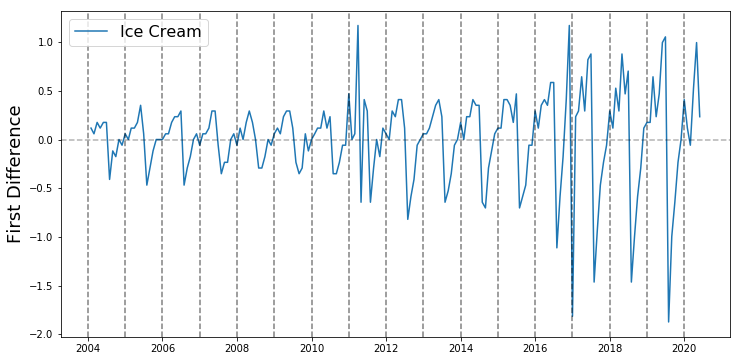

In [153]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

In [154]:
annual_volatility = ice_cream_heater_df.groupby(ice_cream_heater_df.index.year).std()

In [155]:
annual_volatility

,heater,ice cream
Month,,
2004,0.415481,0.184201
2005,0.474527,0.214837
2006,0.400148,0.227698
2007,0.359839,0.198947
2008,0.396182,0.183239
2009,0.499810,0.221038
2010,0.459566,0.211668
2011,0.443924,0.501018
2012,0.471104,0.389711


In [156]:
ice_cream_heater_df['ice_cream_annual_vol'] = ice_cream_heater_df.index.map(lambda d: annual_volatility.loc[d.year, 'ice cream'])
ice_cream_heater_df['heater_annual_vol'] = ice_cream_heater_df.index.map(lambda d: annual_volatility.loc[d.year, 'heater'])

In [157]:
ice_cream_heater_df

,heater,ice cream,ice_cream_annual_vol,heater_annual_vol
Month,,,,
2004-02-01,-0.918789,0.117140,0.184201,0.415481
2004-03-01,-0.408351,0.058570,0.184201,0.415481
2004-04-01,-0.102088,0.175710,0.184201,0.415481
2004-05-01,0.000000,0.117140,0.184201,0.415481
2004-06-01,0.000000,0.175710,0.184201,0.415481
...,...,...,...,...
2020-02-01,-0.714614,0.117140,0.369810,0.426657
2020-03-01,-0.918789,-0.058570,0.369810,0.426657
2020-04-01,0.000000,0.527129,0.369810,0.426657


In [158]:
ice_cream_heater_df['ice cream'] = ice_cream_heater_df['ice cream'] / ice_cream_heater_df['ice_cream_annual_vol']
ice_cream_heater_df['heater'] = ice_cream_heater_df['heater'] / ice_cream_heater_df['heater_annual_vol']

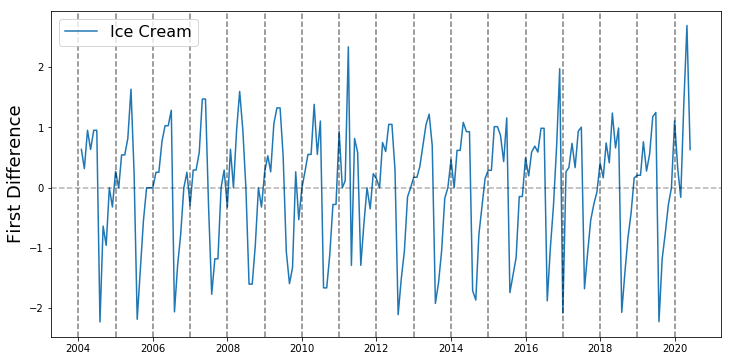

In [159]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

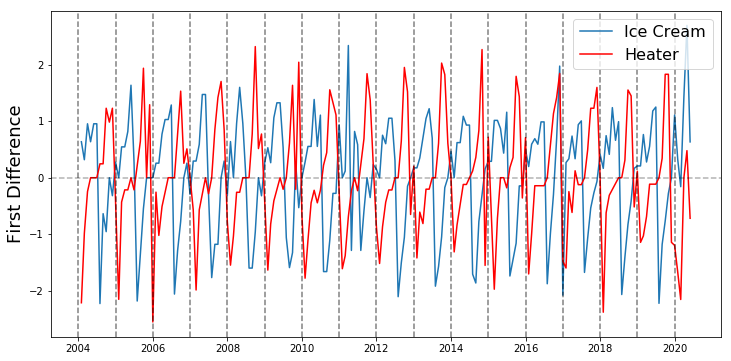

In [160]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

In [161]:
month_avgs = ice_cream_heater_df.groupby(ice_cream_heater_df.index.month).mean()

In [162]:
print(month_avgs)

         heater  ice cream  ice_cream_annual_vol  heater_annual_vol
Month                                                              
1     -0.428360   0.130345              0.415976           0.580717
2     -1.483129   0.250194              0.402342           0.570997
3     -1.063595   0.433016              0.402342           0.570997
4     -0.442926   0.838085              0.402342           0.570997
5     -0.121663   0.967273              0.402342           0.570997
6     -0.128425   0.987311              0.402342           0.570997
7     -0.107093   0.735052              0.404376           0.580018
8      0.075720  -1.821285              0.404376           0.580018
9      0.544638  -1.307661              0.404376           0.580018
10     1.613170  -0.830889              0.404376           0.580018
11     1.183118  -0.088136              0.404376           0.580018
12     0.491641   0.088998              0.404376           0.580018


In [163]:
ice_cream_heater_df['ice_cream_month_avg'] = ice_cream_heater_df.index.map(lambda d: month_avgs.loc[d.month, 'ice cream'])
ice_cream_heater_df['heater_month_avg'] = ice_cream_heater_df.index.map(lambda d: month_avgs.loc[d.month, 'heater'])

In [164]:
ice_cream_heater_df

,heater,ice cream,ice_cream_annual_vol,heater_annual_vol,ice_cream_month_avg,heater_month_avg
Month,,,,,,
2004-02-01,-2.211387,0.635934,0.184201,0.415481,0.250194,-1.483129
2004-03-01,-0.982838,0.317967,0.184201,0.415481,0.433016,-1.063595
2004-04-01,-0.245710,0.953901,0.184201,0.415481,0.838085,-0.442926
2004-05-01,0.000000,0.635934,0.184201,0.415481,0.967273,-0.121663
2004-06-01,0.000000,0.953901,0.184201,0.415481,0.987311,-0.128425
...,...,...,...,...,...,...
2020-02-01,-1.674916,0.316756,0.369810,0.426657,0.250194,-1.483129
2020-03-01,-2.153463,-0.158378,0.369810,0.426657,0.433016,-1.063595
2020-04-01,0.000000,1.425403,0.369810,0.426657,0.838085,-0.442926


In [165]:
ice_cream_heater_df['ice cream'] = ice_cream_heater_df['ice cream'] - ice_cream_heater_df['ice_cream_month_avg']
ice_cream_heater_df['heater'] = ice_cream_heater_df['heater'] - ice_cream_heater_df['heater_month_avg']

In [166]:
ice_cream_heater_df

,heater,ice cream,ice_cream_annual_vol,heater_annual_vol,ice_cream_month_avg,heater_month_avg
Month,,,,,,
2004-02-01,-0.728257,0.385740,0.184201,0.415481,0.250194,-1.483129
2004-03-01,0.080757,-0.115049,0.184201,0.415481,0.433016,-1.063595
2004-04-01,0.197217,0.115816,0.184201,0.415481,0.838085,-0.442926
2004-05-01,0.121663,-0.331339,0.184201,0.415481,0.967273,-0.121663
2004-06-01,0.128425,-0.033411,0.184201,0.415481,0.987311,-0.128425
...,...,...,...,...,...,...
2020-02-01,-0.191787,0.066562,0.369810,0.426657,0.250194,-1.483129
2020-03-01,-1.089868,-0.591394,0.369810,0.426657,0.433016,-1.063595
2020-04-01,0.442926,0.587318,0.369810,0.426657,0.838085,-0.442926


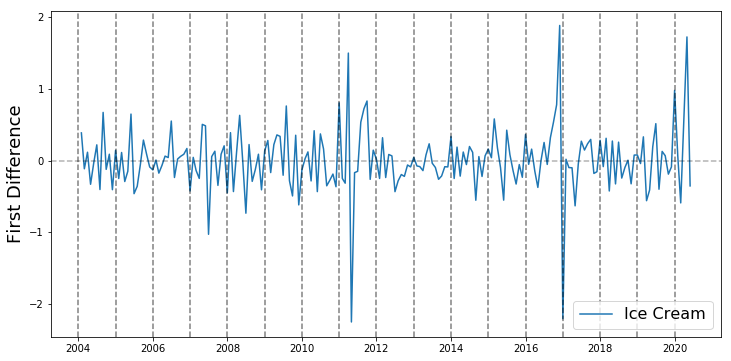

In [167]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

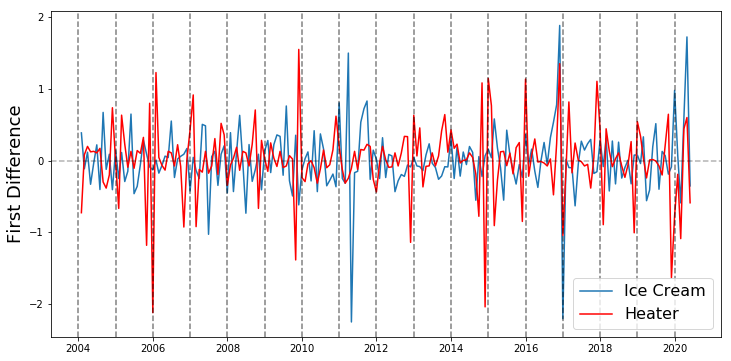

In [168]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

In [169]:
for lag in range(1,14):#lag between 1 to 13 month
    heater_series = ice_cream_heater_df['heater'].iloc[lag:]
    lagged_ice_cream_series = ice_cream_heater_df['ice cream'].iloc[:-lag]#we are predicting heater time series based on lagged version of icecream time series [:-lag] 
    print('Lag: %s'%lag)
    print(pearsonr(heater_series,lagged_ice_cream_series))
    print('-----')


Lag: 1
(-0.031544507425915636, 0.6607284991749967)
-----
Lag: 2
(-0.09872703210944635, 0.1697084190508982)
-----
Lag: 3
(-0.0017838553789235757, 0.9803056762962026)
-----
Lag: 4
(0.060239718598255415, 0.4052979832528944)
-----
Lag: 5
(-0.05403486448015029, 0.45664426275062703)
-----
Lag: 6
(0.06461183026553836, 0.37453000434454764)
-----
Lag: 7
(-0.04949334618415863, 0.49768766857621993)
-----
Lag: 8
(0.07890837135977341, 0.2804548970433407)
-----
Lag: 9
(-0.05323501699600428, 0.4681034202228288)
-----
Lag: 10
(0.029536989060791177, 0.6882054906332707)
-----
Lag: 11
(-0.059795363515225707, 0.41752174204858805)
-----
Lag: 12
(-0.07513046035981792, 0.30944092525429134)
-----
Lag: 13
(0.19808902198429754, 0.007029107082073339)
-----


In [170]:
ice_cream_heater_df['heater'].iloc[lag:]

Month
2005-03-01    0.633324
2005-04-01    0.227791
2005-05-01   -0.093473
2005-06-01    0.128425
2005-07-01   -0.108043
                ...   
2020-02-01   -0.191787
2020-03-01   -1.089868
2020-04-01    0.442926
2020-05-01    0.600210
2020-06-01   -0.589396
Freq: MS, Name: heater, Length: 184, dtype: float64

In [171]:
ice_cream_heater_df['ice cream'].iloc[:-lag]

Month
2004-02-01    0.385740
2004-03-01   -0.115049
2004-04-01    0.115816
2004-05-01   -0.331339
2004-06-01   -0.033411
                ...   
2019-01-01    0.077941
2019-02-01   -0.041908
2019-03-01    0.330699
2019-04-01   -0.560371
2019-05-01   -0.411844
Freq: MS, Name: ice cream, Length: 184, dtype: float64

In [172]:
ice_cream_heater_df['ice cream'].iloc[lag:]

Month
2005-03-01    0.112234
2005-04-01   -0.292835
2005-05-01   -0.149399
2005-06-01    0.648438
2005-07-01   -0.462427
                ...   
2020-02-01    0.066562
2020-03-01   -0.591394
2020-04-01    0.587318
2020-05-01    1.725154
2020-06-01   -0.353799
Freq: MS, Name: ice cream, Length: 184, dtype: float64

In [173]:
ice_cream_heater_df = ice_cream_heater_df[['ice cream','heater']]

In [174]:
model = VAR(ice_cream_heater_df)

In [175]:
model_fit = model.fit(maxlags=13)

In [176]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 17, Dec, 2021
Time:                     13:01:24
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.92349
Nobs:                     184.000    HQIC:                  -2.48459
Log likelihood:          -204.405    FPE:                  0.0571123
AIC:                     -2.86700    Det(Omega_mle):       0.0434311
--------------------------------------------------------------------
Results for equation ice cream
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.016054         0.034105           -0.471           0.638
L1.ice cream         -0.287811         0.079633           -3.614           0.000
L1.heater            -0.121251         0.073673         

In [177]:
lag= model_fit.k_ar
lag

13

In [178]:
model_fit.forecast(ice_cream_heater_df.values[-lag:],steps=5)# taking 13 lag values and forecasting 5 period 

array([[-0.17672811, -0.1027784 ],
       [-0.12986223,  0.42158399],
       [-0.30112579, -0.09025966],
       [-0.35361683,  0.08950411],
       [-0.33926773,  0.10352819]])

In [179]:
df_coeff= pd.DataFrame([model_fit.params['heater'],model_fit.pvalues['heater']]).T
df_coeff.columns=['coeff','pval']
df_coeff

,coeff,pval
const,0.005855,8.710161e-01
L1.ice cream,-0.033113,6.941260e-01
L1.heater,-0.405367,1.953839e-07
L2.ice cream,-0.169804,6.498988e-02
L2.heater,-0.193569,2.177595e-02
L3.ice cream,-0.048999,6.096969e-01
L3.heater,-0.016958,8.425300e-01
L4.ice cream,-0.007633,9.354353e-01
L4.heater,0.009474,9.132318e-01
L5.ice cream,-0.020253,8.320814e-01


In [180]:
df_coeff.query('pval < 0.05')
np.where(df_coeff['pval']<0.05,1,0)

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [181]:
df_coeff['valid']=np.where(df_coeff['pval']<0.05,1,0)
df_coeff

,coeff,pval,valid
const,0.005855,8.710161e-01,0
L1.ice cream,-0.033113,6.941260e-01,0
L1.heater,-0.405367,1.953839e-07,1
L2.ice cream,-0.169804,6.498988e-02,0
L2.heater,-0.193569,2.177595e-02,1
L3.ice cream,-0.048999,6.096969e-01,0
L3.heater,-0.016958,8.425300e-01,0
L4.ice cream,-0.007633,9.354353e-01,0
L4.heater,0.009474,9.132318e-01,0
L5.ice cream,-0.020253,8.320814e-01,0


In [182]:
coeff_arr=df_coeff['coeff'][1:].values#2 features heater, ice cream and 13 lags so 13*2=26
valid_arr=df_coeff['valid'][1:].values
coeff_arr.shape

(26,)

In [183]:
ice_cream_heater_df[-lag:]

,ice cream,heater
Month,,
2019-06-01,0.192975,0.014104
2019-07-01,0.514663,-0.007228
2019-08-01,-0.400430,-0.075720
2019-09-01,0.127374,-0.201675
2019-10-01,0.067174,0.215967
2019-11-01,-0.189578,0.646019
2019-12-01,-0.088998,-1.634852
2020-01-01,0.978302,-0.768009
2020-02-01,0.066562,-0.191787


In [184]:
in_arr=ice_cream_heater_df[-lag:][::-1].stack().to_frame().T.values#lag 1 is at the bottom and lag 13 at the top, that is why i am reversing the order 

In [185]:
in_arr

array([[-0.35379922, -0.5893957 ,  1.72515394,  0.60021004,  0.58731758,
         0.44292637, -0.59139378, -1.08986806,  0.06656194, -0.19178669,
         0.97830178, -0.76800876, -0.08899796, -1.63485182, -0.18957843,
         0.64601905,  0.06717418,  0.21596712,  0.12737449, -0.2016752 ,
        -0.40043034, -0.07572031,  0.51466306, -0.00722846,  0.19297502,
         0.01410436]])

In [186]:
coeff_df=coeff_arr

In [187]:
np.dot(in_arr,coeff_df)+df_coeff['coeff'][:1].values

array([-0.1027784])

In [188]:
df_coeff['coeff'][:1].values

array([0.00585525])

In [189]:
coeff_df=coeff_arr*valid_arr
coeff_df

array([-0.        , -0.40536658, -0.        , -0.19356873, -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.2034506 ,
       -0.        ])

In [190]:
ice_cream_heater_df[-lag:]

,ice cream,heater
Month,,
2019-06-01,0.192975,0.014104
2019-07-01,0.514663,-0.007228
2019-08-01,-0.400430,-0.075720
2019-09-01,0.127374,-0.201675
2019-10-01,0.067174,0.215967
2019-11-01,-0.189578,0.646019
2019-12-01,-0.088998,-1.634852
2020-01-01,0.978302,-0.768009
2020-02-01,0.066562,-0.191787


In [191]:
in_arr=ice_cream_heater_df[-lag:][::-1].stack().to_frame().T.values#lag 1 is at the bottom and lag 13 at the top, that is why i am reversing the order 

In [192]:
in_arr.shape

(1, 26)

In [193]:
in_arr

array([[-0.35379922, -0.5893957 ,  1.72515394,  0.60021004,  0.58731758,
         0.44292637, -0.59139378, -1.08986806,  0.06656194, -0.19178669,
         0.97830178, -0.76800876, -0.08899796, -1.63485182, -0.18957843,
         0.64601905,  0.06717418,  0.21596712,  0.12737449, -0.2016752 ,
        -0.40043034, -0.07572031,  0.51466306, -0.00722846,  0.19297502,
         0.01410436]])

In [194]:
np.dot(in_arr,coeff_df)+df_coeff['coeff'][:1].values

array([0.16785556])